In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
# import data
df = pd.read_csv('/content/rakamin_store_city_monthly.csv',sep=';')

In [ ]:
df.head()

,month,user_id,username,email,kota,total_visit,total_order,total_amount
0,2016-01,16,Kevin Ningsih,kevinningsih@roketmail.com,Jakarta Selatan,95,15,45724
1,2016-01,25,Sakti Hasaniy,saktihasaniy@outlook.com,Jakarta Pusat,97,1,26665
2,2016-01,39,Izhar Halim,izharhalim@gmail.com,Jakarta Timur,84,33,899001
3,2016-02,8,Dikposa Yosua Krisnanto,dikposayosuakrisnanto@hotmail.com,Jakarta Pusat,113,11,22012
4,2016-02,34,Ismail Wardhani,ismailwardhani@hotmail.com,Jakarta Selatan,25,2,55620


In [ ]:
df.tail()

,month,user_id,username,email,kota,total_visit,total_order,total_amount
121,2020-12,75,June Andjani,juneandjani@gmail.com,Jakarta Utara,60,26,645642
122,2020-12,45,Maruto Asih,marutoasih@yahoo.com,Jakarta Utara,44,20,82843
123,2020-12,50,Rizki Faishal Apriyani,rizkifaishalapriyani@roketmail.com,Jakarta Timur,28,17,35000
124,2020-12,64,Amalia Widi Abelardo,amaliawidiabelardo@outlook.com,Depok,10,36,232972
125,2020-12,60,Putri Gasani,putrigsn@gmail.com,Bekasi,80,70,540000


In [ ]:
df.shape

(126, 8)

In [ ]:
# Mengekstrak tahun dan bulan
df['year'] = df['month'].str.split('-', expand=True)[0]
df['month'] = df['month'].str.split('-', expand=True)[1]

# Menampilkan DataFrame setelah ekstraksi
print("DataFrame setelah ekstraksi tahun dan bulan:")
print(df)

DataFrame setelah ekstraksi tahun dan bulan:
    month  user_id                 username  \
0      01       16            Kevin Ningsih   
1      01       25            Sakti Hasaniy   
2      01       39              Izhar Halim   
3      02        8  Dikposa Yosua Krisnanto   
4      02       34          Ismail Wardhani   
..    ...      ...                      ...   
121    12       75             June Andjani   
122    12       45              Maruto Asih   
123    12       50   Rizki Faishal Apriyani   
124    12       64     Amalia Widi Abelardo   
125    12       60             Putri Gasani   

                                  email             kota  total_visit  \
0            kevinningsih@roketmail.com  Jakarta Selatan           95   
1              saktihasaniy@outlook.com    Jakarta Pusat           97   
2                  izharhalim@gmail.com    Jakarta Timur           84   
3     dikposayosuakrisnanto@hotmail.com    Jakarta Pusat          113   
4            ismailwardha

In [ ]:
# lihat struktur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   month         126 non-null    object
 1   user_id       126 non-null    int64 
 2   username      126 non-null    object
 3   email         126 non-null    object
 4   kota          126 non-null    object
 5   total_visit   126 non-null    int64 
 6   total_order   126 non-null    int64 
 7   total_amount  126 non-null    int64 
 8   year          126 non-null    object
dtypes: int64(4), object(5)
memory usage: 9.0+ KB


In [ ]:
# analisis deskriptif
df.describe()

,user_id,total_visit,total_order,total_amount
count,126.000000,126.000000,126.000000,126.000000
mean,44.230159,60.031746,21.182540,303173.825397
std,24.824879,35.145625,11.969562,317012.072661
min,1.000000,10.000000,1.000000,10393.000000
25%,21.250000,28.250000,12.000000,49076.500000
50%,45.000000,57.000000,21.500000,114538.000000
75%,68.750000,98.000000,30.000000,555660.000000
max,88.000000,124.000000,70.000000,983767.000000


In [ ]:
# preprocessing data : menghapus NaN, menghapus duplicate
df.dropna()

,month,user_id,username,email,kota,total_visit,total_order,total_amount,year
0,01,16,Kevin Ningsih,kevinningsih@roketmail.com,Jakarta Selatan,95,15,45724,2016
1,01,25,Sakti Hasaniy,saktihasaniy@outlook.com,Jakarta Pusat,97,1,26665,2016
2,01,39,Izhar Halim,izharhalim@gmail.com,Jakarta Timur,84,33,899001,2016
3,02,8,Dikposa Yosua Krisnanto,dikposayosuakrisnanto@hotmail.com,Jakarta Pusat,113,11,22012,2016
4,02,34,Ismail Wardhani,ismailwardhani@hotmail.com,Jakarta Selatan,25,2,55620,2016
...,...,...,...,...,...,...,...,...,...
121,12,75,June Andjani,juneandjani@gmail.com,Jakarta Utara,60,26,645642,2020
122,12,45,Maruto Asih,marutoasih@yahoo.com,Jakarta Utara,44,20,82843,2020
123,12,50,Rizki Faishal Apriyani,rizkifaishalapriyani@roketmail.com,Jakarta Timur,28,17,35000,2020
124,12,64,Amalia Widi Abelardo,amaliawidiabelardo@outlook.com,Depok,10,36,232972,2020


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['user_id'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['total_visit'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['total_order'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['total_amount'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['user_id'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['total_visit'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['total_order'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['total_amount'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_8, *['kota'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_9, *['year'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_10, *[[['user_id', 'total_visit'], ['total_visit', 'total_order'], ['total_order', 'total_amount']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_11, *['kota', 'year'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['user_id', 'kota'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['user_id', 'year'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_14, *['total_visit', 'kota'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_15, *['total_visit', 'year'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_16, *['year', 'user_id', 'kota'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_17, *['year', 'user_id', 'year'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_18, *['year', 'total_visit', 'kota'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_19, *['year', 'total_visit', 'year'], **{})
chart

In [ ]:
# cek missing values
print('Null Values:',df.isnull().values.sum())

Null Values: 0


In [ ]:
print('Null Values:',df.isnull().values.any())

Null Values: False


In [ ]:
# Mengatasi nilai-nilai yang hilang (missing values)
df.fillna(0, inplace=True)  # Mengisi nilai yang hilang dengan 0, sesuaikan dengan strategi yang sesuai

In [ ]:
df.shape

(126, 9)

In [ ]:
# drop kolom yang tidak diperlukan
df=df.drop(columns=['username', 'email'])

In [ ]:
# Menghitung kuartil 1 (Q1)
Q1 = df['total_amount'].quantile(0.25)

# Menghitung kuartil 3 (Q3)
Q3 = df['total_amount'].quantile(0.75)

# Menghitung rentang interkuartil (IQR)
IQR = Q3 - Q1

# Mendefinisikan batas atas dan batas bawah
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Membuat range untuk mendeteksi outlier
outliers = (df['total_amount'] < lower_limit) | (df['total_amount'] > upper_limit)
outliers1 = (df['total_order'] < lower_limit) | (df['total_order'] > upper_limit)
outliers2 = (df['total_visit'] < lower_limit) | (df['total_visit'] > upper_limit)

# Menampilkan outlier
print("Data yang dianggap outlier:")
print(df[outliers])
print(df[outliers1])
print(df[outliers2])

Data yang dianggap outlier:
Empty DataFrame
Columns: [month, user_id, username, email, kota, total_visit, total_order, total_amount, year]
Index: []
Empty DataFrame
Columns: [month, user_id, username, email, kota, total_visit, total_order, total_amount, year]
Index: []
Empty DataFrame
Columns: [month, user_id, username, email, kota, total_visit, total_order, total_amount, year]
Index: []


In [ ]:
# Mengelola outlier (misalnya dengan z-score atau metode lain)
# Misalnya, jika ingin menghilangkan outlier dengan z-score di kolom 'total_amount':
z_scores = (df['total_amount'] - df['total_amount'].mean()) / df['total_amount'].std()
df = df[(z_scores < 3)]  # Mengambil data dengan z-score kurang dari 3

In [ ]:
# Mengubah data kategori menjadi one-hot encoding
df = pd.get_dummies(df, columns=['kota'])  # Menggunakan one-hot encoding untuk kolom 'kota'

In [ ]:
# Normalisasi atau scaling jika diperlukan (misalnya, menggunakan StandardScaler)
scaler = StandardScaler()
df[['total_visit', 'total_order', 'total_amount']] = scaler.fit_transform(df[['total_visit', 'total_order', 'total_amount']])

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('total_visit', axis=1)  # Ganti 'target_column' dengan kolom target yang sesuai
y = df['total_amount']  # Ganti 'target_column' dengan kolom target yang sesuai

# Bagi dataset menjadi data pelatihan (80%) dan data pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan informasi tentang pembagian data
print("Jumlah data latih (X_train, y_train):", len(X_train), len(y_train))
print("Jumlah data uji (X_test, y_test):", len(X_test), len(y_test))

Jumlah data latih (X_train, y_train): 100 100
Jumlah data uji (X_test, y_test): 26 26


In [ ]:
# Pisahkan fitur (X) dan target (y)
#X = df.drop('total_amount', axis=1)  # X adalah selain variabel total_amount
#y = df['total_amount']  # y adalah variabel total_amount

# Bagi data menjadi data latih dan data uji
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan informasi tentang pembagian data
#print("Jumlah data latih (X_train, y_train):", len(X_train), len(y_train))
#print("Jumlah data uji (X_test, y_test):", len(X_test), len(y_test))

Jumlah data latih (X_train, y_train): 100 100
Jumlah data uji (X_test, y_test): 26 26


In [ ]:
# Membuat model regresi linear
model = LinearRegression()

In [ ]:
# Melatih model menggunakan data latih
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Membuat prediksi menggunakan model
y_pred = model.predict(X_test)

# Tampilkan hasil prediksi
print("Hasil prediksi:", y_pred)

Hasil prediksi: [-0.76073673 -0.92658229 -0.58012006 -0.78507548 -0.69779801  1.39005534
 -0.12151903  1.48475954 -0.88098949  1.96579276 -0.78401452  0.43528895
  0.81616748 -0.48510865  0.43528895  1.7902782  -0.47121165  0.33684447
  0.42634838  0.31947322 -0.86556281 -0.89867428 -0.78938583 -0.81535561
 -0.79065265 -0.75900435]


In [ ]:
# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

# Tampilkan hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 3.140813960729567e-30
Coefficient of Determination (R-squared): 1.0


In [ ]:
# Evaluasi model
koefisien = model.coef_
intersepsi = model.intercept_

# Tampilkan koefisien dan intersepsi
print("Koefisien:", koefisien)
print("Intersepsi:", intersepsi)

Koefisien: [-2.99884172e-16 -2.42861287e-17  1.61025707e-15  1.00000000e+00
 -1.19804340e-16 -3.71759372e-16  2.55126324e-16 -2.01539631e-16
 -6.68258173e-17  4.48859699e-17 -8.26797330e-17  1.67793839e-16
  3.59322811e-16]
Intersepsi: 2.447000935212884e-13


In [ ]:
# Melihat koefisien regresi
coefficients = model.coef_
print("Koefisien Regresi:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

Koefisien Regresi:
month: -2.998841721007164e-16
user_id: -2.42861286636753e-17
total_order: 1.6102570665754712e-15
total_amount: 0.9999999999999996
year: -1.1980434005964824e-16
kota_Bekasi: -3.717593724181234e-16
kota_Depok: 2.5512632371299526e-16
kota_Jakarta Barat: -2.015396313378992e-16
kota_Jakarta Pusat: -6.682581734068077e-17
kota_Jakarta Selatan: 4.4885969940899884e-17
kota_Jakarta Timur: -8.267973301443951e-17
kota_Jakarta Utara: 1.6779383871928788e-16
kota_Tangerang: 3.5932281117006214e-16


##### Analisis hasil
##### total_order memiliki koefisien regresi yang lebih besar segingga menjadi faktor yang paling bepengaruh disusul oleh total_amount namun untuk kota yang paling berpengaruhha dalah kota tangerang. Dalam hal ini jika suatu fitur memiliki koefisien yang besar (positif atau negatif), itu menunjukkan bahwa fitur tersebut memiliki pengaruh yang signifikan terhadap hasil prediksi. Sebaliknya, koefisien yang mendekati nol menunjukkan bahwa fitur tersebut memiliki pengaruh yang rendah terhadap hasil prediksi. Dengan menganalisis koefisien regresi, kita dapat mengidentifikasi faktor-faktor yang paling berpengaruh dalam memprediksi jumlah penjualan berdasarkan model yang telah dibangun.

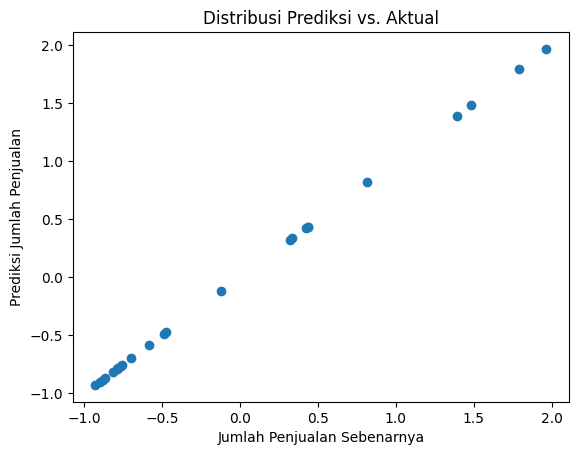

In [ ]:
# Visualisasi distribusi prediksi vs. aktual
plt.scatter(y_test, y_pred)
plt.xlabel("Jumlah Penjualan Sebenarnya")
plt.ylabel("Prediksi Jumlah Penjualan")
plt.title("Distribusi Prediksi vs. Aktual")
plt.show()

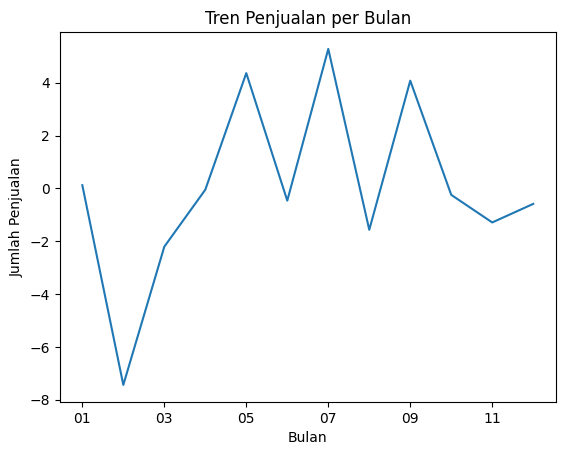

In [ ]:
# Visualisasi tren penjualan (misalnya, jumlah penjualan per bulan)
tren_penjualan = df.groupby('month')['total_amount'].sum()
tren_penjualan.plot(kind='line')
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penjualan")
plt.title("Tren Penjualan per Bulan")
plt.show()